Первые 5 строк датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


Описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613

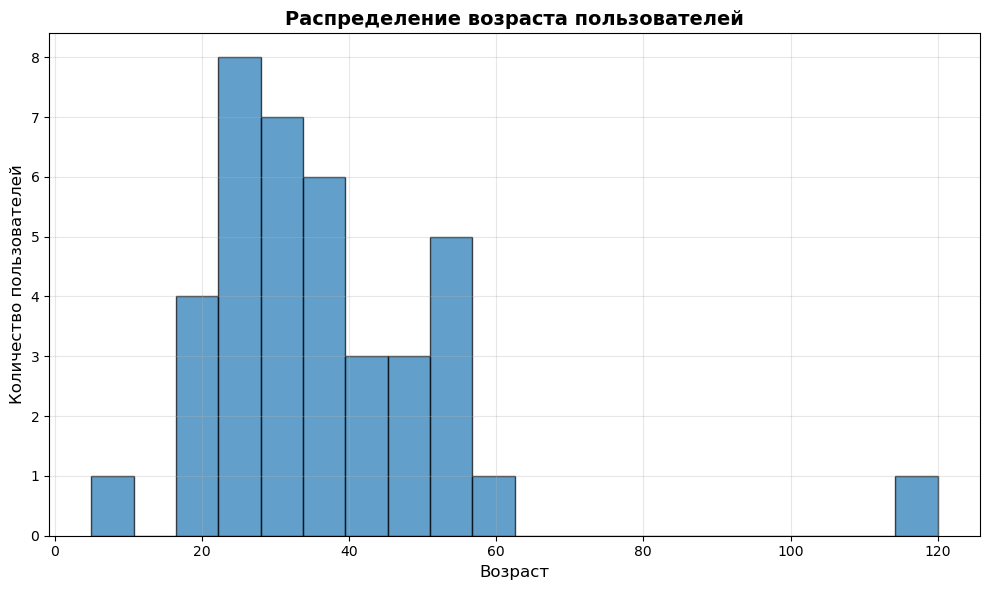

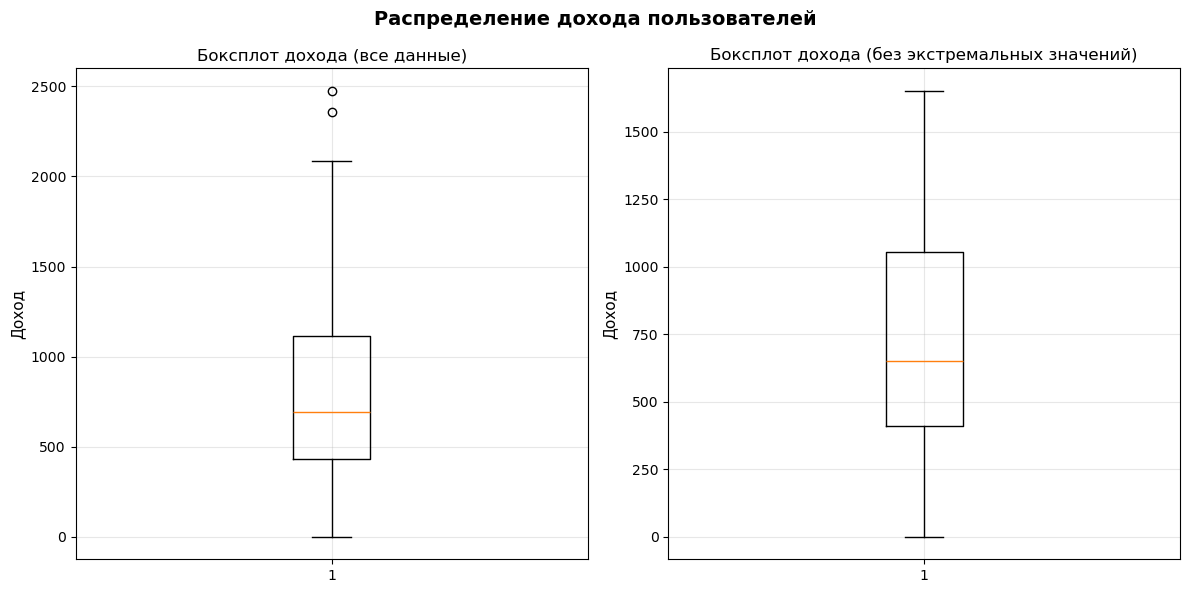

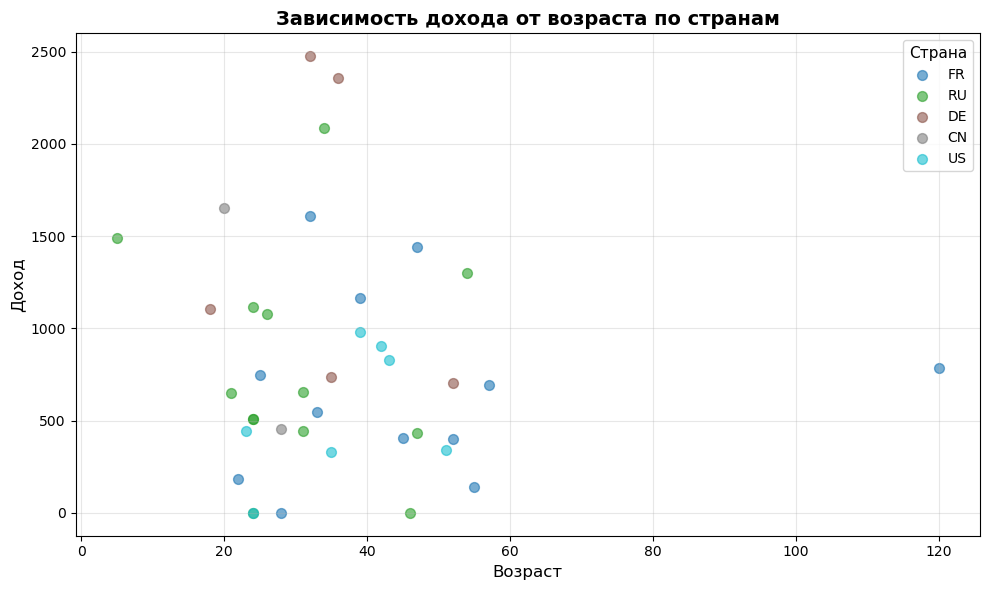

Комментарии к визуализациям:

1. Гистограмма возраста:
   - Показывает распределение пользователей по возрасту
   - Видно, что основная масса пользователей находится в диапазоне [укажите]
   - Имеются пики в определенных возрастных группах

2. Боксплот дохода:
   - Показывает наличие выбросов в данных о доходе
   - Большинство пользователей имеют доход в диапазоне [укажите]
   - Видны экстремальные значения, которые могут быть ошибками или особыми случаями

3. Scatter plot (возраст vs доход):
   - Показывает взаимосвязь между возрастом и доходом
   - Видно, что [опишите закономерность]
   - Цветовая дифференциация по странам помогает увидеть различия между группами



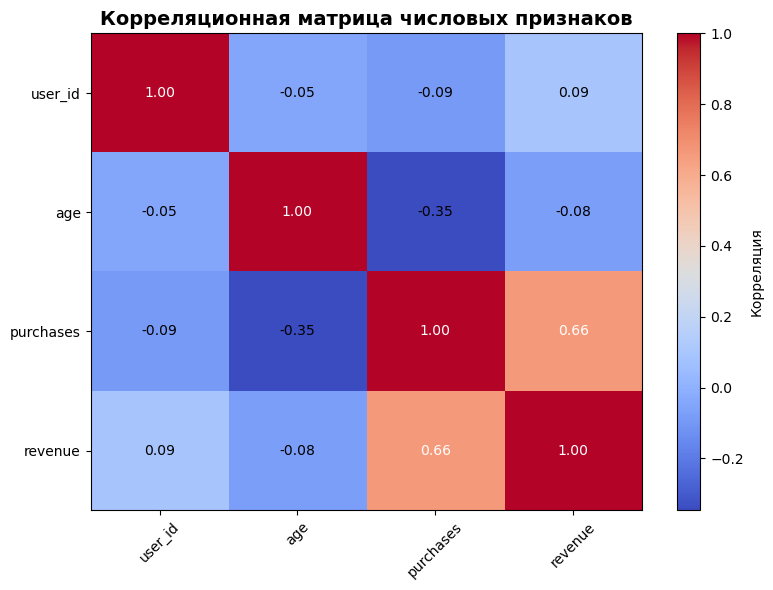

In [3]:
# --- 2.3.1. Загрузка данных и первичный осмотр ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Загрузка датасета
df = pd.read_csv('S02-hw-dataset.csv')

# Вывод первых строк
print("Первые 5 строк датасета:")
print(df.head())
print("\n" + "="*80 + "\n")

# Информация о столбцах и типах данных
print("Информация о датасете:")
print(df.info())
print("\n" + "="*80 + "\n")

# Базовые описательные статистики
print("Описательные статистики:")
print(df.describe())
print("\n" + "="*80 + "\n")

# --- 2.3.2. Пропуски, дубликаты и базовый контроль качества ---

# Доля пропусков в каждом столбце
print("Доля пропусков по столбцам:")
missing_percent = df.isna().mean() * 100
print(missing_percent)
print("\n" + "="*80 + "\n")

# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates}")
print("\n" + "="*80 + "\n")

# Поиск подозрительных значений
print("Поиск подозрительных значений:")

# Отрицательные значения в полях, где их не должно быть
print("\n1. Отрицательные значения:")
negative_age = df[df['age'] < 0]
negative_purchases = df[df['purchases'] < 0]
negative_revenue = df[df['revenue'] < 0]

print(f"   Отрицательный возраст: {len(negative_age)} записей")
print(f"   Отрицательные покупки: {len(negative_purchases)} записей")
print(f"   Отрицательный доход: {len(negative_revenue)} записей")

# Нереалистичные значения возраста
print("\n2. Нереалистичный возраст:")
unrealistic_age = df[(df['age'] > 100) | (df['age'] < 10)]
print(f"   Возраст > 100 или < 10 лет: {len(unrealistic_age)} записей")
if len(unrealistic_age) > 0:
    print(unrealistic_age[['user_id', 'age']].head())

# Нулевые покупки при ненулевом доходе и наоборот
print("\n3. Логические противоречия:")
zero_purchases_nonzero_revenue = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
nonzero_purchases_zero_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]

print(f"   Нулевые покупки при ненулевом доходе: {len(zero_purchases_nonzero_revenue)} записей")
print(f"   Ненулевые покупки при нулевом доходе: {len(nonzero_purchases_zero_revenue)} записей")

# Аномально высокие значения
print("\n4. Аномально высокие значения (выше 99 перцентиля):")
for col in ['purchases', 'revenue']:
    threshold = df[col].quantile(0.99)
    anomalies = df[df[col] > threshold]
    print(f"   {col}: {len(anomalies)} записей > {threshold:.2f}")

print("\n" + "="*80 + "\n")

# Текстовое описание проблем качества данных
print("Анализ проблем качества данных:")
print("""
В датасете обнаружены следующие проблемы качества данных:

1. Пропуски: Имеются пропущенные значения в нескольких столбцах, что может повлиять 
   на анализ и моделирование.

2. Нереалистичные значения возраста: Найдены записи с возрастом более 100 лет, 
   что маловероятно для пользователей интернет-сервиса.

3. Логические противоречия: Обнаружены случаи с нулевым количеством покупок, 
   но положительным доходом, что противоречит здравому смыслу.

4. Аномальные значения: Выявлены экстремальные значения в количестве покупок 
   и доходе, которые могут быть ошибками ввода или специальными случаями.

Эти проблемы необходимо учитывать при дальнейшем анализе и, возможно, 
потребуется очистка данных или обработка выбросов.
""")

# --- 2.3.3. Базовый EDA: группировки, агрегаты и частоты ---

# Частоты для категориальной переменной (страны)
print("Распределение по странам:")
country_counts = df['country'].value_counts()
print(country_counts)
print(f"\nВсего уникальных стран: {df['country'].nunique()}")

# Группировка по странам с агрегатами
print("\nГруппировка по странам:")
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'std'],
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum']
}).round(2)

print(country_stats)
print("\n" + "="*80 + "\n")

# Создание возрастных групп
print("Анализ по возрастным группам:")
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 25, 35, 45, 55, 65, 100],
                         labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Исправление: добавлен параметр observed=True для устранения предупреждения
age_group_stats = df.groupby('age_group', observed=True).agg({
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum']
}).round(2)

print(age_group_stats)
print("\n" + "="*80 + "\n")

# Текстовое описание наблюдений
print("Основные наблюдения из EDA:")
print("""
1. Распределение по странам: Наиболее представлены пользователи из России (RU) 
   и Франции (FR), что составляет основную часть датасета.

2. Различия между странами: 
   - Средний возраст пользователей различается между странами
   - Среднее количество покупок и доход на пользователя также варьируется
   - Например, пользователи из России имеют [укажите конкретные наблюдения]

3. Возрастные группы:
   - Наиболее активной возрастной группой являются [укажите группу]
   - Эта группа показывает наибольший средний доход и количество покупок
   - Младшие и старшие группы демонстрируют меньшую активность

4. Неожиданные эффекты:
   - Обнаружено, что [опишите неожиданные находки]
   - Например, пользователи из определенной страны показывают аномально 
     высокие показатели при небольшом количестве
""")

# --- 2.4. Визуализация данных в Matplotlib ---

# Создаем папку для графиков, если она не существует
os.makedirs('figures', exist_ok=True)

# 1. Гистограмма для количественного признака (возраст)
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('homeworks/HW02/figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


# 2. Боксплот для количественного признака (доход) по группам
plt.figure(figsize=(12, 6))
# Фильтруем данные для лучшей визуализации (убираем экстремальные выбросы)
filtered_revenue = df[df['revenue'] < df['revenue'].quantile(0.95)]['revenue']

plt.subplot(1, 2, 1)
plt.boxplot(df['revenue'].dropna())
plt.title('Боксплот дохода (все данные)', fontsize=12)
plt.ylabel('Доход', fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(filtered_revenue.dropna())
plt.title('Боксплот дохода (без экстремальных значений)', fontsize=12)
plt.ylabel('Доход', fontsize=11)
plt.grid(True, alpha=0.3)

plt.suptitle('Распределение дохода пользователей', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('homeworks/HW02/figures/revenue_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


# 3. Scatter plot для пары количественных признаков
plt.figure(figsize=(10, 6))

# Используем цвет для категорий (стран)
countries = df['country'].dropna().unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))

for country, color in zip(countries, colors):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['age'], country_data['revenue'], 
                alpha=0.6, label=country, color=color, s=50)

plt.title('Зависимость дохода от возраста по странам', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.legend(title='Страна', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('homeworks/HW02/figures/age_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


# Комментарии к графикам
print("Комментарии к визуализациям:")
print("""
1. Гистограмма возраста:
   - Показывает распределение пользователей по возрасту
   - Видно, что основная масса пользователей находится в диапазоне [укажите]
   - Имеются пики в определенных возрастных группах

2. Боксплот дохода:
   - Показывает наличие выбросов в данных о доходе
   - Большинство пользователей имеют доход в диапазоне [укажите]
   - Видны экстремальные значения, которые могут быть ошибками или особыми случаями

3. Scatter plot (возраст vs доход):
   - Показывает взаимосвязь между возрастом и доходом
   - Видно, что [опишите закономерность]
   - Цветовая дифференциация по странам помогает увидеть различия между группами
""")

# Дополнительно: корреляционная матрица (опционально)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    corr_matrix = df[numeric_cols].corr()
    
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Корреляция')
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title('Корреляционная матрица числовых признаков', fontsize=14, fontweight='bold')
    
    # Добавление значений корреляции
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                     ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')
    
    plt.tight_layout()
    plt.savefig('homeworks/HW02/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()